In [5]:
from pyabsa import AspectPolarityClassification as APC

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 from pyabsa import AspectPolarityClassification as APC                                       │
│   2                                                                                              │
│                                                                                                  │
│ c:\Users\chenk\AppData\Local\Programs\Python\Python37\lib\site-packages\pyabsa\__init__.py:15 in │
│ <module>                                                                                         │
│                                                                                                  │
│   12 from pyabsa.framework.flag_class import *                                                   │
│   13                                                                                             │
│   14 from pyabsa.utils.data_utils.dataset_item import DatasetItem                                │
│ ❱ 15 from pyabsa.utils.absa_utils.make_absa_dataset import make_ABSA_dataset                     │
│   16 from pyabsa.utils.absa_utils.absa_utils import (                                            │
│   17 │   generate_inference_set_for_apc,                                                         │
│   18 │   convert_apc_set_to_atepc_set,                                                           │
│                                                                                                  │
│ c:\Users\chenk\AppData\Local\Programs\Python\Python37\lib\site-packages\pyabsa\utils\absa_utils\ │
│ make_absa_dataset.py:18 in <module>                                                              │
│                                                                                                  │
│    15                                                                                            │
│    16 from pyabsa import LabelPaddingOption                                                      │
│    17                                                                                            │
│ ❱  18 from pyabsa.tasks.AspectTermExtraction.prediction.aspect_extractor import (                │
│    19 │   AspectExtractor,                                                                       │
│    20 )                                                                                          │
│    21 from pyabsa.utils.pyabsa_utils import fprint                                               │
│                                                                                                  │
│ c:\Users\chenk\AppData\Local\Programs\Python\Python37\lib\site-packages\pyabsa\tasks\AspectTermE │
│ xtraction\prediction\aspect_extractor.py:28 in <module>                                          │
│                                                                                                  │
│    25 from pyabsa import LabelPaddingOption, TaskCodeOption, DeviceTypeOption                    │
│    26 from pyabsa.framework.prediction_class.predictor_template import InferenceModel            │
│    27 from ..models import ATEPCModelList                                                        │
│ ❱  28 from ..dataset_utils.__lcf__.atepc_utils import (                                          │
│    29 │   load_atepc_inference_datasets,                                                         │
│    30 │   process_iob_tags,                                                                      │
│    31 )                                                                                          │
│                                                                                                  │
│ c:\Users\chenk\AppData\Local\Programs\Python\Python37\lib\s

In [3]:
sentiment_classifier = APC.SentimentClassifier("\Model-PyABSA\checkpoints")

<>:1: DeprecationWarning: invalid escape sequence \M


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 sentiment_classifier = APC.SentimentClassifier("\Model-PyABSA\checkpoints")                  │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'APC' is not defined

In [1]:
import spacy
spacy.cli.download("en_core_web_sm")

c:\Users\chenk\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
spacy.load('en_core_web_sm')

In [1]:
x = "ANALYZING THE POPULARITY OF INDONESIA'S 2024 PRESIDENTIAL CANDIDATES ON TWITTER USING BERT SENTIMENT ANALYSIS"
x.title()

"Analyzing The Popularity Of Indonesia'S 2024 Presidential Candidates On Twitter Using Bert Sentiment Analysis"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df_anies = pd.read_csv("data/anies_1-dec-2023__5-jan-2024.csv")
df_prabowo = pd.read_csv("data/prabowo_1-dec-2023__5-jan-2024.csv")
df_ganjar = pd.read_csv("data/ganjar_1-dec-2023__5-jan-2024.csv")

df_anies['created_at'] = pd.to_datetime(df_anies['created_at'])
df_anies = df_anies.sort_values(by='created_at' , ascending=False)
df_prabowo['created_at'] = pd.to_datetime(df_prabowo['created_at'])
df_prabowo = df_prabowo.sort_values(by='created_at' , ascending=False)
df_ganjar['created_at'] = pd.to_datetime(df_ganjar['created_at'])
df_ganjar = df_ganjar.sort_values(by='created_at' , ascending=False)

df_anies = df_anies.set_index('created_at')
df_prabowo = df_prabowo.set_index('created_at')
df_ganjar = df_ganjar.set_index('created_at')

In [14]:
df_anies_res = df_anies.resample('2D').median()
df_prabowo_res = df_prabowo.resample('2D').median()
df_ganjar_res = df_ganjar.resample('2D').median()

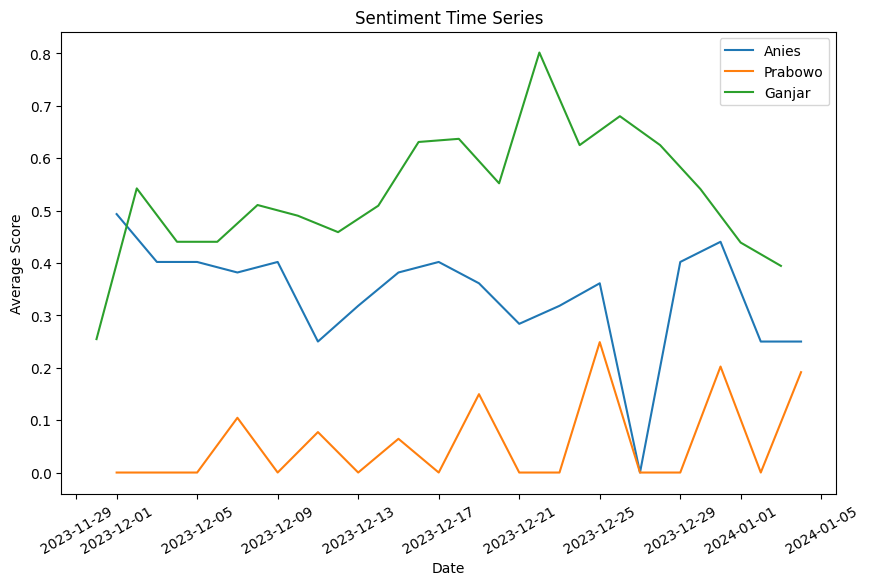

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df_anies_res.index, df_anies_res['score'], linestyle='-', marker='', label='Anies')
plt.plot(df_prabowo_res.index, df_prabowo_res['score'], linestyle='-', marker='', label='Prabowo')
plt.plot(df_ganjar_res.index, df_ganjar_res['score'], linestyle='-', marker='', label='Ganjar')
plt.title('Sentiment Time Series')
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.xticks(rotation=30, fontsize=10)
# plt.xlim(df_anies_res.index.min(), df_anies_res.index.max())
# plt.ylim(-1, 1)
# plt.xaxis.set_major_formatter(plt.dates.DateFormatter('%b %d'))
plt.legend()
plt.show()

In [11]:
count_negative = df_anies['label'].value_counts().get(-1, 0)
count_negative

1354

In [10]:
df_anies['label'].value_counts()

 1    4940
 0    1701
-1    1354
Name: label, dtype: int64

In [22]:
sorted_df = df_prabowo.sort_values(by='favorite_count', ascending=False)

top_5data = sorted_df[sorted_df['label'] == -1].head(5)[['full_text', 'username']]


print(top_5data)

                                                                   full_text  \
created_at                                                                     
2023-12-14 23:45:11+00:00  Yang mulai main politik identitas di 2014-2019...   
2023-12-11 23:20:04+00:00  Bagi kakak ku dan banyak orang yg trauma soal ...   
2023-12-28 23:50:10+00:00  Mantan Aktivis Nilai Citra Gemoy Diciptakan un...   
2023-12-14 23:48:44+00:00  Anies soal Tudingan Serang Prabowo saat Debat:...   
2023-12-21 23:37:39+00:00  Tipu² Food Estate di Rezim @jokowi.!!!   Hutan...   

                                 username  
created_at                                 
2023-12-14 23:45:11+00:00    itsquaileggs  
2023-12-11 23:20:04+00:00       erasmus70  
2023-12-28 23:50:10+00:00      tempodotco  
2023-12-14 23:48:44+00:00    CNNIndonesia  
2023-12-21 23:37:39+00:00  Nicho_Silalahi  


In [30]:
daily_counts = df_anies.resample('D').size()
daily_counts
# mean_counts_2days = daily_counts.rolling(window=2).mean()
# # Plot the data
# plt.figure(figsize=(10, 6))
# mean_counts_2days.plot(kind='bar', color='skyblue')
# plt.title('Mean Daily Counts Every Two Days')
# plt.xlabel('Date')
# plt.ylabel('Mean Daily Count')
# plt.show()

created_at
2023-12-01 00:00:00+00:00     80
2023-12-02 00:00:00+00:00    136
2023-12-03 00:00:00+00:00     97
2023-12-04 00:00:00+00:00    147
2023-12-05 00:00:00+00:00    152
2023-12-06 00:00:00+00:00     48
2023-12-07 00:00:00+00:00     94
2023-12-08 00:00:00+00:00    312
2023-12-09 00:00:00+00:00    303
2023-12-10 00:00:00+00:00     90
2023-12-11 00:00:00+00:00    190
2023-12-12 00:00:00+00:00    304
2023-12-13 00:00:00+00:00    312
2023-12-14 00:00:00+00:00    300
2023-12-15 00:00:00+00:00    309
2023-12-16 00:00:00+00:00    141
2023-12-17 00:00:00+00:00    302
2023-12-18 00:00:00+00:00     69
2023-12-19 00:00:00+00:00    148
2023-12-20 00:00:00+00:00    305
2023-12-21 00:00:00+00:00    256
2023-12-22 00:00:00+00:00    304
2023-12-23 00:00:00+00:00    310
2023-12-24 00:00:00+00:00      0
2023-12-25 00:00:00+00:00    315
2023-12-26 00:00:00+00:00    302
2023-12-27 00:00:00+00:00    246
2023-12-28 00:00:00+00:00    304
2023-12-29 00:00:00+00:00    304
2023-12-30 00:00:00+00:00    303

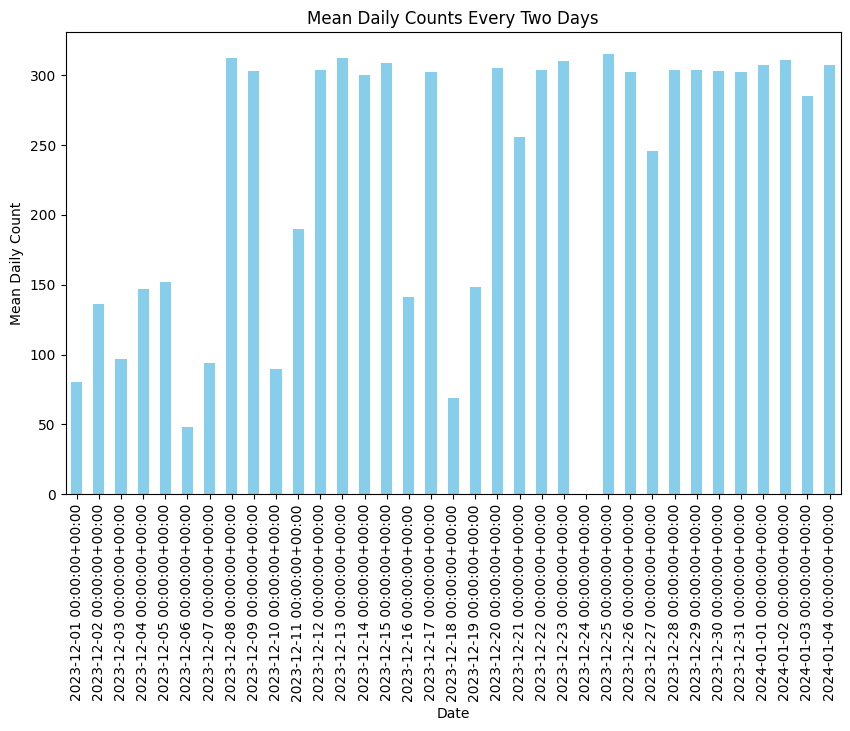

In [29]:
daily_counts = df_anies.resample('D').size()
# mean_counts_2days = daily_counts.rolling(window=2).mean()
# Plot the data
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='bar', color='skyblue')
plt.title('Mean Daily Counts Every Two Days')
plt.xlabel('Date')
plt.ylabel('Mean Daily Count')
plt.show()

In [58]:
from nltk import *
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import json
from logging import raiseExceptions
import re
import string
# from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
# factory = StopWordRemoverFactory()
# stopwords = factory.get_stop_words()
# print(stopwords)


slangword_path = 'data/combined_slang_words.txt'

with open(slangword_path, 'r') as file:
    slang_word = file.read()
    slang_word = json.loads(slang_word)

dari = ["tdk", "gak", "ngga", "ga", "yg", "emng", "mmng", "k\
np", "stlh", "gara2", "krn", "hrs", "msh", "bkn", "yaa", "trs", "sdh", "\
untk",\
"dgn", "mksd", "gk", "y", "thn", "jd", "skrg", "samp\
e", "bapakk", 'dlm', 'cuuuy', "yg ", 'tak', 'kalo', 'sekrng', 'kek', 'gu\
e', 'sya', "kpd", 'alia', 'ama','banget']
hasil = ["tidak", "tidak", "tidak", "tidak", "yang", "memang\
", "memang", "kenapa", "setelah", "karena", "karena", "harus", "masih",\
"bukan", "ya", "terus", "sudah",\
"untuk", "dengan", "maksud", "tidak", "ya", "tahun"\
, "jadi", "sekarang", "sampai", "bapak", 'dalam', '', "yang ", 'tidak',\
'kalau', 'sekarang', 'seperti', 'kamu', 'saya', 'kepada', "alias", 'sama\
','sangat']
result_dict = dict(zip(dari, hasil))

slang_word.update(result_dict)

def cleaning_tweets(input):
    tweet = str(input)
    # remove link, mention, etc
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'$', '', tweet)
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    tweet = re.sub(r'https?://[A-Za-z0-9./]+','',tweet)
    tweet = re.sub(r'https//[A-Za-z0-9./]+','',tweet)
    tweet = tweet.replace("\n","")
    tweet = re.sub('@[\w]+', '', tweet)

    tweet = re.sub(r"n't", " not ", tweet)
    tweet = re.sub(r"\'s", " ", tweet)
    tweet = re.sub(r"\'ve", " have ", tweet)
    tweet = re.sub(r"\'re", " are ", tweet)
    tweet = re.sub(r"\'d", " would ", tweet)
    tweet = re.sub(r"\'ll", " will ", tweet)

    # remove emoji
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
    tweet = emoji_pattern.sub(r'', tweet)

    # remove punctuation -> tidak digunakan untuk memperkuat akurasi Translate
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    tweet =  tweet.translate(translator)

    # remove excessive space
    tweet = re.sub(r'\s+', ' ', tweet)

    # case folding
    tweet = tweet.lower()
    tweet = tweet.strip()
    return tweet

def normalized_slang(text):
    tokens = word_tokenize(text)
    normalized_words = [slang_word.get(token, token) for token in tokens]
    # combined_string = ' '.join(normalized_words)
    return normalized_words

def remove_stopwords(text):
    stop_words = set(stopwords.words('indonesian'))
    # word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in text if not w in stop_words]
    return ' '.join(filtered_sentence)

def tokenize_tweet(text):
    tweet = cleaning_tweets(text)
    tweet = normalized_slang(tweet)
    tweet = remove_stopwords(tweet)
    if tweet == '':
      return None
    return word_tokenize(tweet)

In [59]:
df_prabowo['new_text'] = df_prabowo["full_text"].apply(tokenize_tweet)
df_exploded = df_prabowo.explode('new_text')

# Extract the combined list from the exploded DataFrame
combined_list = df_exploded['new_text'].tolist()

In [60]:
combined_list = [word for word in combined_list if word is not None]

In [49]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color=None)

In [61]:
text = ' '.join(combined_list)

In [62]:
wordcloud.generate(text)

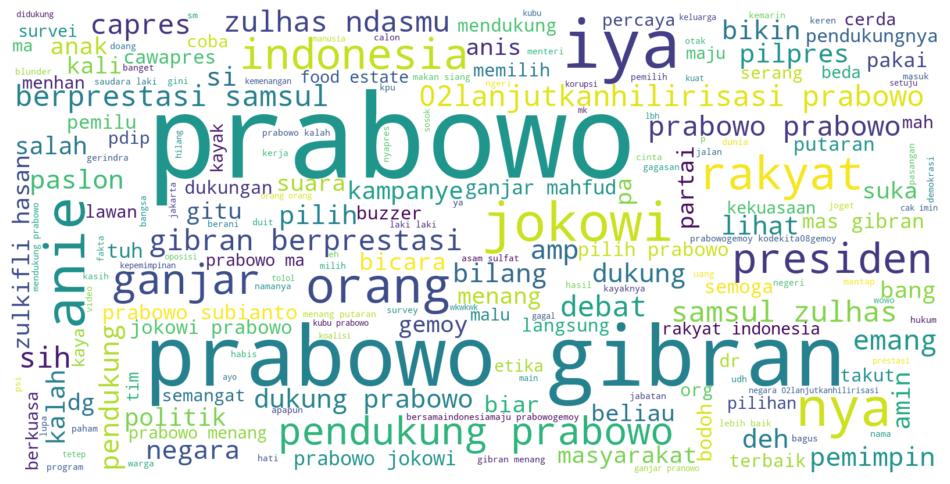

In [63]:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [64]:
from pyabsa import AspectTermExtraction as ATEPC, available_checkpoints

aspect_extractor = ATEPC.AspectExtractor('multilingual',
                                         auto_device=True,  # False means load model on CPU
                                         cal_perplexity=True,
                                         )

# instance inference
aspect_extractor.predict(['I hate this movie, at least the service is nice'],
                         save_result=False,
                         print_result=True,  # print the result
                         ignore_error=True,  # ignore the error when the model cannot predict the input
                         )

# inference_source = ATEPC.ATEPCDatasetList.Restaurant16
# atepc_result = aspect_extractor.batch_predict(target_file=inference_source,  #
#                                               save_result=True,
#                                               print_result=True,  # print the result
#                                               pred_sentiment=True,  # Predict the sentiment of extracted aspect terms
#                                               )

# print(atepc_result)

c:\Users\chenk\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


No CUDA GPU found in your device
[2024-01-12 17:43:13] (2.4.0) PyABSA(2.4.0): If your code crashes on Colab, please use the GPU runtime. Then run "pip install pyabsa[dev] -U" and restart the kernel.
Or if it does not work, you can use v1.x versions, e.g., pip install pyabsa<2.0 -U




Try to downgrade transformers<=4.29.0.






c:\Users\chenk\AppData\Local\Programs\Python\Python39\lib\multiprocessing\pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=1>
  _warn(f"unclosed running multiprocessing pool {self!r}",


[2024-01-12 17:43:24] (2.4.0) ********** Available ATEPC model checkpoints for Version:2.4.0 (this version) **********
[2024-01-12 17:43:24] (2.4.0) ********** Available ATEPC model checkpoints for Version:2.4.0 (this version) **********
[2024-01-12 17:43:24] (2.4.0) Downloading checkpoint:multilingual 
[2024-01-12 17:43:24] (2.4.0) Notice: The pretrained model are used for testing, it is recommended to train the model on your own custom datasets


Find zipped checkpoint: ./checkpoints\ATEPC_MULTILINGUAL_CHECKPOINT\fast_lcf_atepc_Multilingual_cdw_apcacc_85.1_apcf1_80.2_atef1_76.45.zip, unzipping


Done.
[2024-01-12 17:46:00] (2.4.0) If the auto-downloading failed, please download it via browser: https://huggingface.co/spaces/yangheng/PyABSA/resolve/main/checkpoints/Multilingual/ATEPC/fast_lcf_atepc_Multilingual_cdw_apcacc_85.1_apcf1_80.2_atef1_76.45.zip 
[2024-01-12 17:46:00] (2.4.0) Load aspect extractor from checkpoints\ATEPC_MULTILINGUAL_CHECKPOINT
[2024-01-12 17:46:00] (2.4.0) config: checkpoints\ATEPC_MULTILINGUAL_CHECKPOINT\fast_lcf_atepc.config
[2024-01-12 17:46:00] (2.4.0) state_dict: checkpoints\ATEPC_MULTILINGUAL_CHECKPOINT\fast_lcf_atepc.state_dict
[2024-01-12 17:46:00] (2.4.0) model: None
[2024-01-12 17:46:00] (2.4.0) tokenizer: checkpoints\ATEPC_MULTILINGUAL_CHECKPOINT\fast_lcf_atepc.tokenizer
[2024-01-12 17:46:01] (2.4.0) Set Model Device: cpu
[2024-01-12 17:46:01] (2.4.0) Device Name: Unknown


c:\Users\chenk\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\chenk\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
c:

[2024-01-12 17:50:29] (2.4.0) Example 0: I love this <movie:Positive Confidence:0.9983> , it is so great !


[{'sentence': 'I love this movie , it is so great !',
  'IOB': ['O', 'O', 'O', 'B-ASP', 'O', 'O', 'O', 'O', 'O', 'O'],
  'tokens': ['I',
   'love',
   'this',
   'movie',
   ',',
   'it',
   'is',
   'so',
   'great',
   '!'],
  'aspect': ['movie'],
  'position': [[3]],
  'sentiment': ['Positive'],
  'probs': [[0.0009741311077959836,
    0.0006780652911402285,
    0.9983477592468262]],
  'confidence': [0.9983]}]

In [68]:
aspect_extractor.predict(['i like  this movie, but the food is really bad'],
                         save_result=False,
                         print_result=True,  # print the result
                         ignore_error=True,  # ignore the error when the model cannot predict the input
                         )

[2024-01-12 18:07:59] (2.4.0) Example 0: i like this movie , but the <food:Negative Confidence:0.9943> is really bad


[{'sentence': 'i like this movie , but the food is really bad',
  'IOB': ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ASP', 'O', 'O', 'O'],
  'tokens': ['i',
   'like',
   'this',
   'movie',
   ',',
   'but',
   'the',
   'food',
   'is',
   'really',
   'bad'],
  'aspect': ['food'],
  'position': [[7]],
  'sentiment': ['Negative'],
  'probs': [[0.994346559047699, 0.0019132370362058282, 0.0037401088047772646]],
  'confidence': [0.9943]}]

In [4]:
# Specify the path to the text file
file_path = 'ganjar.test.dat.apc.txt'

# Open the file and read the lines
try:
    with open(file_path, 'r') as file:
        # Read all lines into a list
        lines = file.readlines()

        # Count the number of lines
        num_lines = len(lines)

        # Print the number of lines
        print(f"The file '{file_path}' has {num_lines} lines.")
except FileNotFoundError:
    print(f"File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

The file 'ganjar.test.dat.apc.txt' has 300 lines.
